# MATH 210 Introduction to Mathematical Computing

## April 4, 2018

* Weather data
    * Import csv
    * Create columns using pandas.apply
    * Groupby
    * Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The Government of Canada's [Department of Environment and Climate Change](https://www.canada.ca/en/environment-climate-change.html) collects [weather data](https://weather.gc.ca/) across the country. The data is only available in small datasets but the wonderful website [weatherstats.ca](https://www.weatherstats.ca/) has compiled many years of hourly weather data for many cities!

I downloaded hourly weather data from the [Vancouver airport weather station](https://vancouver.weatherstats.ca/about.html) from July 2012 until today! I uploaded the `.csv` file to my website so that we can all access the same data. Let's take a look!

In [2]:
data = pd.read_csv('https://www.math.ubc.ca/~pwalls/data/weather.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
date_time_local      50000 non-null object
unixtime             50000 non-null int64
pressure_station     50000 non-null float64
pressure_sea         50000 non-null float64
wind_dir             49246 non-null object
wind_dir_10s         49405 non-null float64
wind_speed           50000 non-null int64
wind_gust            4179 non-null float64
relative_humidity    50000 non-null int64
dew_point            50000 non-null float64
temperature          50000 non-null float64
windchill            1968 non-null float64
humidex              2439 non-null float64
visibility           49981 non-null float64
health_index         49554 non-null float64
cloud_cover_4        0 non-null float64
cloud_cover_8        38820 non-null float64
cloud_cover_10       5654 non-null float64
solar_radiation      0 non-null float64
dtypes: float64(14), int64(3), object(2)
memory usage: 7.2+ MB


In [4]:
data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-04-04 10:00:00 PDT,1522861200,101.85,101.9,ESE,11.0,14,NaN,79,3.9,7.2,NaN,NaN,48300.0,NaN,NaN,NaN,NaN,NaN
1,2018-04-04 09:00:00 PDT,1522857600,101.81,101.9,ESE,11.0,18,NaN,79,3.2,6.6,NaN,NaN,48300.0,2.6,NaN,8.0,NaN,NaN
2,2018-04-04 08:00:00 PDT,1522854000,101.80,101.9,E,8.0,17,NaN,78,2.6,6.0,NaN,NaN,48300.0,2.5,NaN,8.0,NaN,NaN
3,2018-04-04 07:00:00 PDT,1522850400,101.80,101.9,E,9.0,10,NaN,79,1.9,5.3,NaN,NaN,48300.0,2.4,NaN,8.0,NaN,NaN
4,2018-04-04 06:00:00 PDT,1522846800,101.78,101.8,ESE,10.0,13,NaN,80,2.1,5.2,NaN,NaN,32200.0,2.3,NaN,8.0,NaN,NaN


There's a lot of data but we'll focus on wind speed and direction, and temperature.

In [5]:
data = pd.read_csv('https://www.math.ubc.ca/~pwalls/data/weather.csv',usecols=[0,4,6,10])

In [6]:
data.head()

,date_time_local,wind_dir,wind_speed,temperature
0,2018-04-04 10:00:00 PDT,ESE,14,7.2
1,2018-04-04 09:00:00 PDT,ESE,18,6.6
2,2018-04-04 08:00:00 PDT,E,17,6.0
3,2018-04-04 07:00:00 PDT,E,10,5.3
4,2018-04-04 06:00:00 PDT,ESE,13,5.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
date_time_local    50000 non-null object
wind_dir           49246 non-null object
wind_speed         50000 non-null int64
temperature        50000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


It would be great to get the year, month, day and hour of the data as new columns. The pandas [datetime](https://pandas.pydata.org/pandas-docs/stable/timeseries.html) object would be the best tool here but let's try it a different way.

Let's look at the first string in the data.

In [8]:
first_row_date = data['date_time_local'][0]

In [9]:
print(first_row_date)

2018-04-04 10:00:00 PDT


In [10]:
type(first_row_date)

str

A string is a list of characters and so we can select out the year as the first 4 characters (and convert to an integer). Let's pull the year out of the string as an integer!

In [11]:
int(first_row_date[0:4])

2018

Let's write a function which does this operation.

In [12]:
def get_year(text):
    return int(text[0:4])

In [13]:
get_year('2018-04-04 10:00:00 PDT')

2018

Now let's apply this to the whole date column to create a new column for the year! Check out the documentation for [pandas.apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [14]:
data['year'] = data['date_time_local'].apply(get_year)

Let's do the same for the month, day and hour!

In [15]:
def get_month(text):
    return int(text[5:7])

def get_day(text):
    return int(text[8:10])

def get_hour(text):
    return int(text[11:13])

data['month'] = data['date_time_local'].apply(get_month)
data['day'] = data['date_time_local'].apply(get_day)
data['hour'] = data['date_time_local'].apply(get_hour)

In [16]:
data.head()

,date_time_local,wind_dir,wind_speed,temperature,year,month,day,hour
0,2018-04-04 10:00:00 PDT,ESE,14,7.2,2018,4,4,10
1,2018-04-04 09:00:00 PDT,ESE,18,6.6,2018,4,4,9
2,2018-04-04 08:00:00 PDT,E,17,6.0,2018,4,4,8
3,2018-04-04 07:00:00 PDT,E,10,5.3,2018,4,4,7
4,2018-04-04 06:00:00 PDT,ESE,13,5.2,2018,4,4,6


Let's look at average temperature by month.

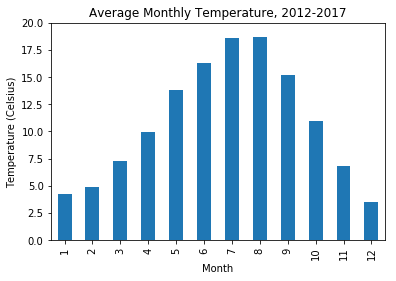

In [17]:
data.groupby('month')['temperature'].mean().plot(kind='bar')
plt.title('Average Monthly Temperature, 2012-2017')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.ylim([0,20])
plt.show()

Let's do the same but compare year to year. We don't have all data for 2012 or 2018 so we'll restrict our attention to 2013-2017.

In [18]:
temps = data.groupby(['month','year'])['temperature'].mean().unstack()

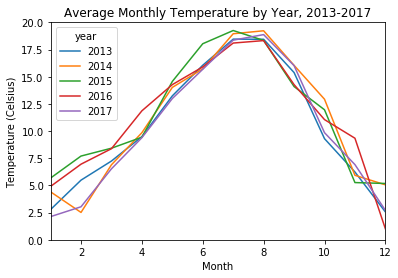

In [19]:
temps[[2013,2014,2015,2016,2017]].plot()
plt.title('Average Monthly Temperature by Year, 2013-2017')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.ylim([0,20])
plt.show()

Let's look at the predominant wind direction!

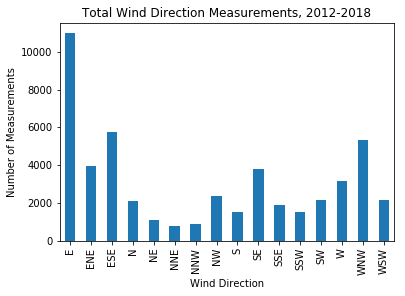

In [20]:
data.groupby('wind_dir').size().plot(kind='bar')
plt.title('Total Wind Direction Measurements, 2012-2018')
plt.xlabel('Wind Direction')
plt.ylabel('Number of Measurements')
plt.show()

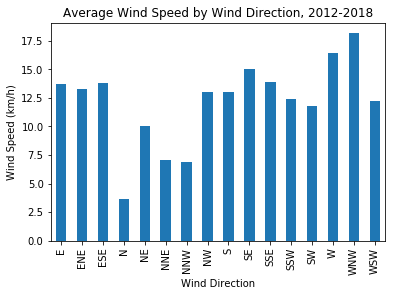

In [21]:
data.groupby('wind_dir')['wind_speed'].mean().plot(kind='bar')
plt.title('Average Wind Speed by Wind Direction, 2012-2018')
plt.xlabel('Wind Direction')
plt.ylabel('Wind Speed (km/h)')
plt.show()